# 2020 US Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
import statsmodels.formula.api as smf

## Things Explored in this notebook
- initial exploration of cleaned datasets for happiness and cases in US
- different methods of visualizing happiness vs. cases data (daily, weekly, monthly, interpolated)

## Load cleaned csv's into df

In [2]:
us_hap_filter= pd.read_csv('../data/cleaned_data/2020/us_hap_cleaned.csv')
us_covid = pd.read_csv('../data/cleaned_data/2020/us_covid.csv')

## Initial investigation 

In [3]:
us_hap_filter

,Unnamed: 0,date,week,state,mental_health_condition,age,gender,happiness_rating
0,4976,2020-04-30,week 5,Georgia,No,40,Male,2
1,4977,2020-04-30,week 5,New Jersey,No,62,Female,6
2,4978,2020-04-30,week 5,Indiana,No,61,Female,9
3,4979,2020-04-30,week 5,Virginia,No,60,Female,9
4,4980,2020-04-30,week 5,Michigan,No,37,Female,3
...,...,...,...,...,...,...,...,...
12001,16977,2020-09-29,week 16,Oklahoma,No,27,Female,4
12002,16978,2020-09-29,week 16,California,No,74,Female,5
12003,16979,2020-09-29,week 16,Rhode Island,No,26,Female,5
12004,16980,2020-09-30,week 16,Mississippi,No,22,Male,8


In [4]:
us_hap_filter= us_hap_filter.drop(['Unnamed: 0'], axis=1)

In [5]:
us_hap_filter['date'] = pd.to_datetime(us_hap_filter['date'])

In [6]:
# Get some information on dataset and range
us_hap_filter['happiness_rating'].describe()

count    12006.000000
mean         6.235632
std          2.297499
min          0.000000
25%          5.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: happiness_rating, dtype: float64

In [7]:
us_hap_filter['happiness_rating'] = us_hap_filter['happiness_rating'].astype(float)

In [8]:
us_hap_filter.groupby(['date','state'])['happiness_rating'].mean()

date        state     
2020-01-05  Alabama        5.750000
            Alaska         5.500000
            Arizona        5.666667
            Arkansas       9.000000
            California     7.066667
                            ...    
2020-12-07  Tennessee      6.000000
            Utah           6.000000
            Virginia       7.000000
            Washington     5.500000
            Wisconsin     10.000000
Name: happiness_rating, Length: 2636, dtype: float64

In [9]:
us_hap_filter.groupby('state')['happiness_rating'].mean()

state
Alabama                 6.144860
Alaska                  5.301887
Arizona                 6.576512
Arkansas                6.163462
California              6.118289
Colorado                6.405128
Connecticut             6.491379
Delaware                5.702128
District of Columbia    6.387755
Florida                 6.437360
Georgia                 6.352657
Hawaii                  6.125000
Idaho                   6.067568
Illinois                6.125285
Indiana                 6.459091
Iowa                    6.268041
Kansas                  6.054054
Kentucky                5.807487
Louisiana               6.184211
Maine                   6.136364
Maryland                5.940541
Massachusetts           6.025105
Michigan                6.171521
Minnesota               6.079602
Mississippi             6.151163
Missouri                6.502242
Montana                 6.500000
Nebraska                6.533333
Nevada                  5.981818
New Hampshire           5.921875
New 

In [10]:
us_hap_filter.groupby('week')['happiness_rating'].mean()

week
week 10    6.272547
week 11    6.303983
week 12    6.218839
week 13    6.305607
week 14    5.994000
week 15    6.155330
week 16    6.187371
week 5     6.301097
week 6     6.390674
week 7     6.289264
week 8     6.225549
week 9     6.183920
Name: happiness_rating, dtype: float64

In [11]:
us_covid

,Unnamed: 0,Province_State,date,cases
0,0,Alabama,2020-01-22,0
1,1,Alabama,2020-01-22,0
2,2,Alabama,2020-01-22,0
3,3,Alabama,2020-01-22,0
4,4,Alabama,2020-01-22,0
...,...,...,...,...
1058775,1058775,Wyoming,2020-12-03,1693
1058776,1058776,Wyoming,2020-12-03,1149
1058777,1058777,Wyoming,2020-12-03,0
1058778,1058778,Wyoming,2020-12-03,497


In [12]:
us_covid= us_covid.drop(['Unnamed: 0'], axis=1)

### Group COVID-19 cases by date

First thing is to group by date

In [13]:
us_covid['date'] = pd.to_datetime(us_covid['date'])

In [14]:
us_date_cov= us_covid.groupby('date').sum()

Text(0, 0.5, 'Cases')

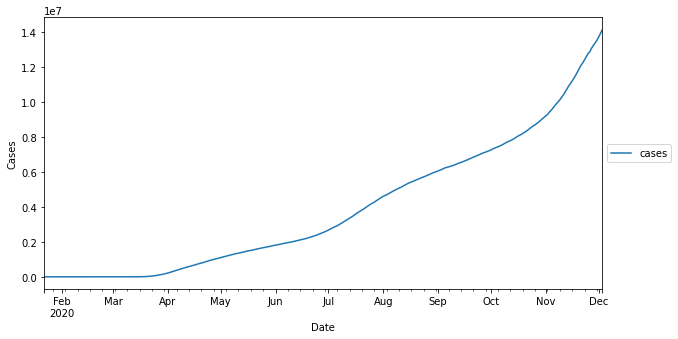

In [15]:
us_date_cov.plot(kind='line',figsize=(10,5))
plt.legend(loc= 'center left', bbox_to_anchor=(1.0,0.5))
plt.xlabel('Date')
plt.ylabel('Cases')

In [16]:
us_date_cov['daily_change']=us_date_cov['cases'].diff()

<AxesSubplot:xlabel='date'>

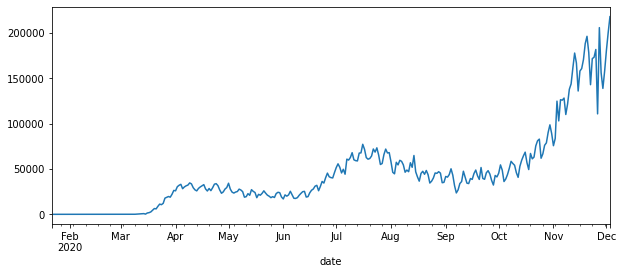

In [17]:
us_date_cov['daily_change'].plot(figsize=(10,4))

### Observations
This trajectory does not surprise me at all... Peak in April, peak in mid-July, and another surge in December that is still ongoing. Roughly a 2 month intermission in between surges.

#### Exported clean subset

In [18]:
us_date_cov.to_csv('../data/exported_subset_data/covid/covid_us.csv')

In [19]:
us_hap_df=us_hap_filter.groupby('date')['happiness_rating'].mean().reset_index()


In [20]:
us_hap_df['date'] = pd.to_datetime(us_hap_df['date'])

In [21]:
us_hap_df

,date,happiness_rating
0,2020-01-05,6.296429
1,2020-01-06,6.000000
2,2020-01-07,6.461538
3,2020-02-05,6.404762
4,2020-02-06,5.800000
...,...,...
96,2020-11-06,6.139130
97,2020-11-07,6.041096
98,2020-12-05,6.031579
99,2020-12-06,6.049505


### Observations

Only 101 rows and I see that the happiness rating was not collected consistently for every day of the month. This poses some challenges in terms of how to match the happiness with the cases. I'll start by trying with daily plots.

## Happiness ratings vs. COVID-19 daily case changes

<AxesSubplot:label='7ff44078-b89b-42a4-ac86-6a390e8b9336'>

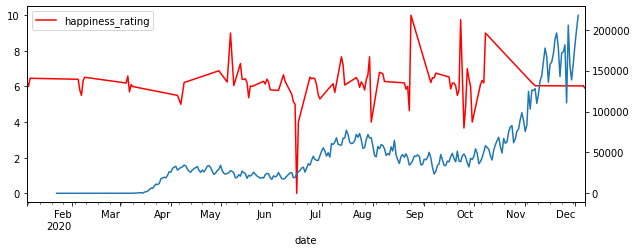

In [22]:
us_hap_df.plot(x='date',y='happiness_rating',color='red',grid=True)

us_date_cov['daily_change'].plot(figsize=(10,4), secondary_y=True)

### Observations

I find it a little difficult to extract much out of this plot. I do see some peaks and low-points on the happiness graph, but before I can try to match up cases and happiness, I'll try different visualization methods.

## Monthly happiness rating means

In [23]:
us_hap_df['month_year'] = pd.to_datetime(us_hap_df['date']).dt.to_period('M')
us_hap_df

,date,happiness_rating,month_year
0,2020-01-05,6.296429,2020-01
1,2020-01-06,6.000000,2020-01
2,2020-01-07,6.461538,2020-01
3,2020-02-05,6.404762,2020-02
4,2020-02-06,5.800000,2020-02
...,...,...,...
96,2020-11-06,6.139130,2020-11
97,2020-11-07,6.041096,2020-11
98,2020-12-05,6.031579,2020-12
99,2020-12-06,6.049505,2020-12


In [24]:
merged_df= pd.merge(left=us_hap_df, left_on='date',
         right=us_date_cov, right_on='date')
merged_df

,date,happiness_rating,month_year,cases,daily_change
0,2020-02-05,6.404762,2020-02,11,0.0
1,2020-02-06,5.800000,2020-02,12,1.0
2,2020-02-07,5.500000,2020-02,12,0.0
3,2020-02-08,6.333333,2020-02,12,0.0
4,2020-02-09,6.517986,2020-02,12,0.0
...,...,...,...,...,...
90,2020-10-07,6.200855,2020-10,7536022,50641.0
91,2020-10-08,9.000000,2020-10,7594351,58329.0
92,2020-11-05,6.214286,2020-11,9645772,126190.0
93,2020-11-06,6.139130,2020-11,9771480,125708.0


<AxesSubplot:label='d307edae-9521-4303-af02-e3e123038d8e'>

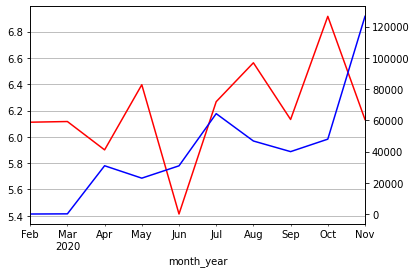

In [25]:
month_hap=merged_df.groupby('month_year')['happiness_rating'].mean()
month_hap.plot(color='red',grid=True)
month_cov=merged_df.groupby('month_year')['daily_change'].mean()
month_cov.plot(color='blue', grid=True, secondary_y=True)

### Observations

Some connections seen again; it's interesting that the trajectory and pattern of cases in Denmark and Finland are somewhat similar to US (first surge earlier 2020 followed by huge surge right now) although the # of cases in the US is simply astonishing. We see dip in happiness in April with peak #1 that same month. Decline in happiness recently as we experience another wave of cases.

## Weekly happiness ratings and weekly COVID-19

Daily plots were too spiky for happiness; monthly a little too generalized. Going to try weekly plots now for visualization.

In [26]:
di = {'week 5': '2020-04-30',
      'week 6': '2020-05-08',
      'week 7': '2020-05-15',
      'week 8': '2020-05-27',
      'week 9': '2020-06-09',
      'week 10': '2020-06-24',
      'week 11': '2020-07-08',
      'week 12': '2020-07-22',
      'week 13': '2020-08-06',
      'week 14': '2020-08-20',
      'week 15': '2020-09-02',
      'week 16': '2020-09-16',}
us_hap_filter['week']= us_hap_filter['week'].map(di)  

In [27]:
us_hap_filter['week']=pd.to_datetime(us_hap_filter['week'])

In [28]:
weekly_covid=us_date_cov.rolling(7).mean()

<AxesSubplot:xlabel='date'>

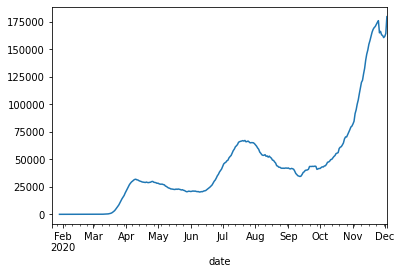

In [29]:
## weekly covid cases plot to be used later on
weekly_covid['daily_change'].plot()

<AxesSubplot:label='c65fa48d-a53f-4c65-9470-9bf00a19eee7'>

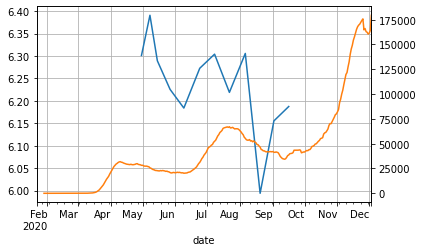

In [30]:
weekly = us_hap_filter.groupby('week')['happiness_rating'].mean()
weekly.plot()
weekly_covid['daily_change'].plot(grid=True, secondary_y=True)

This also isn't too ideal.

## Interpolated Happiness Ratings

Going to try interpolated ratings to see if I can generate a reasonably smoother curve that may be easier to analyze alongside cases data.

In [31]:
ushap_daily=us_hap_df.set_index(pd.to_datetime(us_hap_df['date']))

In [32]:
ushap_daily=ushap_daily[['date', 'happiness_rating']]

In [33]:
ushap_daily.to_csv('../data/exported_subset_data/happiness_2020/interpolated_us.csv')

<AxesSubplot:label='c01ac7eb-f452-4cd7-938f-a8a1c22adef7'>

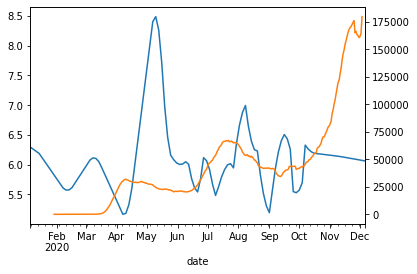

In [34]:
# resample and interpolate missing values and calculate average
## pair with weekly covid cases plot from before
ushap_daily.resample('3D').interpolate().rolling('10D')['happiness_rating'].mean().plot()
weekly_covid['daily_change'].plot(secondary_y=True)

### Observations

Better graph. Some common patterns where happiness dips in April with first peak. As things stabilize a bit in May and June, happiness increases and peaks but drops back down in July and August when second peak is seen. Seems to fluctuate where the correlations are not as clear but now that cases are surging again, happiness declines once more.

## Happiness rating mean for 2020 as a whole in US

In [35]:
us_hap_filter['happiness_rating'].mean()

6.235632183908046

### Observations

US happiness rating in 2019 was 6.94. Decrease between 2020 and 2019, although not as dramatic as I expected. Seems to be similar trends as experienced by Denmark, Finland, and US.